In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('data\\car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
for i in df.columns.values:
    print("unique values in",str(i))
    print(df[i].nunique())

unique values in Car_Name
98
unique values in Year
16
unique values in Selling_Price
156
unique values in Present_Price
147
unique values in Kms_Driven
206
unique values in Fuel_Type
3
unique values in Seller_Type
2
unique values in Transmission
2
unique values in Owner
3


OBSERVATION
    dropping car names would be better 
    transform year to duration
    
    rest later


In [11]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
final_df = df.copy()
final_df.drop('Car_Name',axis=1,inplace=True)
final_df


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
##solving year issue
final_df.insert(8,"Age", df["Year"].max()+1 - df["Year"] ) # 0 is the position and age is the name and the operation is (year max+1) - year
final_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


In [14]:
final_df.drop('Year',axis=1,inplace=True)

In [15]:
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())
print(df.Fuel_Type.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [16]:
## categorical features
final_df = pd.get_dummies(final_df,drop_first=True,dtype=int) # we have dropped every dummy variable.....i.e. petrol deisel rkh liya 
final_df.head()                                         # and cng uda diya kyoki petrol ka 0 and diesel ka 0 makes true case ko cng

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,5,0,1,0,1
1,4.75,9.54,43000,0,6,1,0,0,1
2,7.25,9.85,6900,0,2,0,1,0,1
3,2.85,4.15,5200,0,8,0,1,0,1
4,4.60,6.87,42450,0,5,1,0,0,1


In [17]:
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<Axes: >

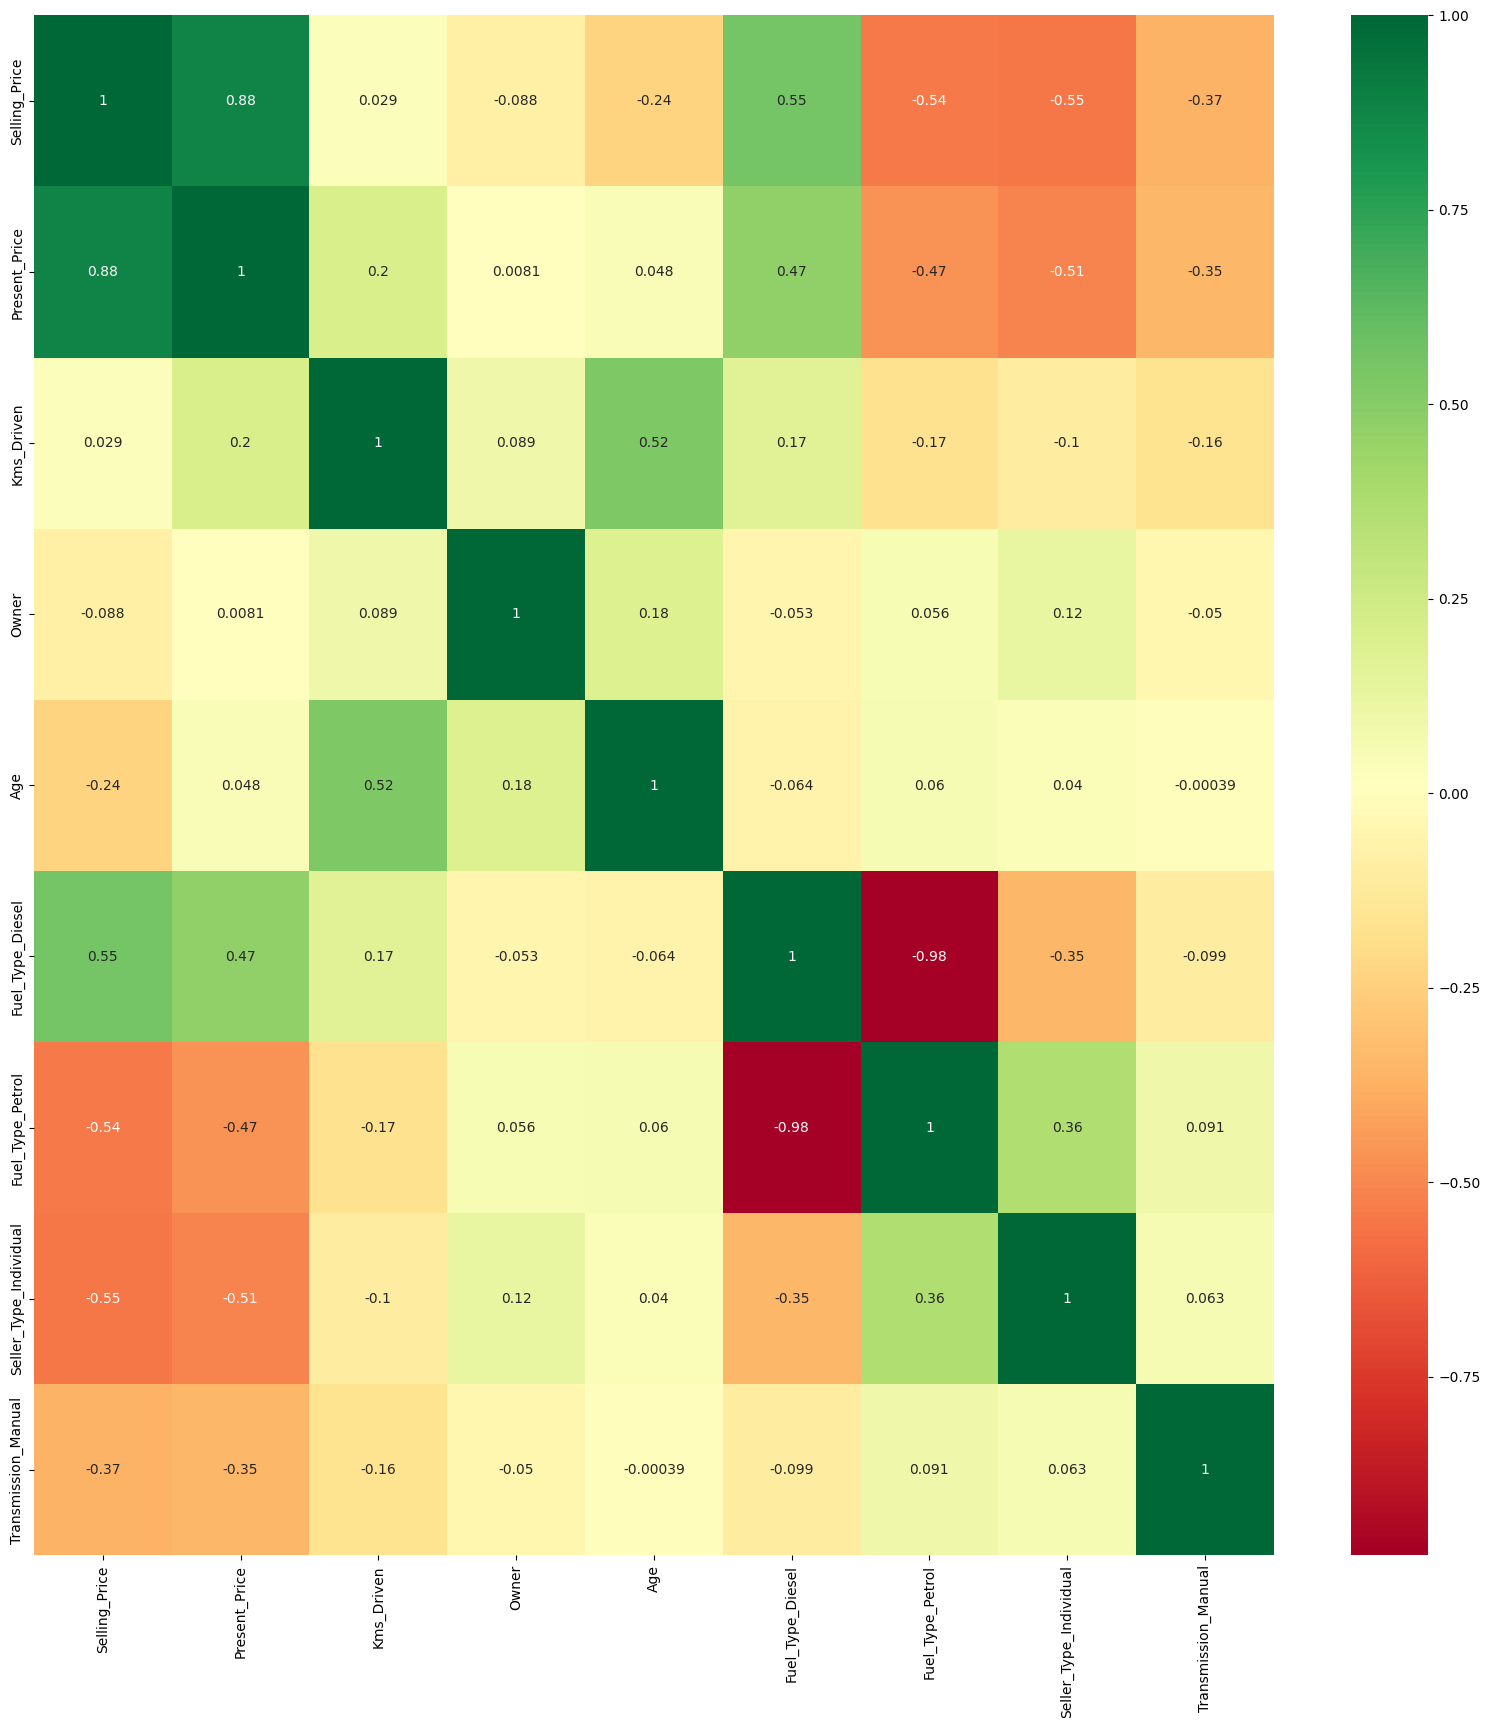

In [19]:
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

selling price is  y dependant variable 
and rest in independant variable i.e. X

In [20]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,5,0,1,0,1
1,4.75,9.54,43000,0,6,1,0,0,1
2,7.25,9.85,6900,0,2,0,1,0,1
3,2.85,4.15,5200,0,8,0,1,0,1
4,4.60,6.87,42450,0,5,1,0,0,1


In [21]:
X=final_df.iloc[:,1:]

y=final_df.iloc[:,:1]
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [22]:
X

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,5,0,1,0,1
1,9.54,43000,0,6,1,0,0,1
2,9.85,6900,0,2,0,1,0,1
3,4.15,5200,0,8,0,1,0,1
4,6.87,42450,0,5,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,3,1,0,0,1
297,5.90,60000,0,4,0,1,0,1
298,11.00,87934,0,10,0,1,0,1
299,12.50,9000,0,2,1,0,0,1


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.40241537 0.04109108 0.00048441 0.07764876 0.21215377 0.01427553
 0.124285   0.12764608]


<Axes: >

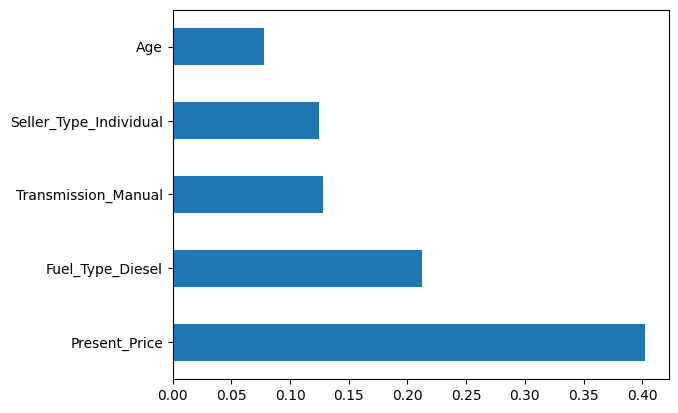

In [23]:
from sklearn.ensemble import ExtraTreesRegressor  # to check for feature importance
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.sort_values(ascending=False)
feat_importance.nlargest(5).plot(kind='barh')      #NLARGEST MATLAB JO TOP 5 HAi


In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [30]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# scoring_metrics = ['accuracy', 'f1_macro', 'precision', 'recall', 'roc_auc']

In [31]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
            #    'scoring':scoring_metrics}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [32]:
rf = RandomForestRegressor()

In [33]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error',
                                 n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
#                                 n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [34]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END max_depth=15, max_f

e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.3s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.1s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.5s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.0s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.4s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.1s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   6.6s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.8s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   9.2s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   8.6s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.5s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   4.5s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   6.2s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   5.9s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   5.4s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   2.7s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   6.2s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   3.9s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.7s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.0s


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py", line 436, in _val

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [35]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [30]:
# without randomsearch
params = {'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

rf = RandomForestRegressor(**params)
rf.fit(X_train,y_train)

predictions = rf.predict(X_test)
predictions


e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([ 2.85307,  5.4848 ,  0.41065,  7.48195,  5.7717 ,  3.85602,
        4.4248 ,  0.49807,  0.93351,  5.48605,  1.02714,  6.16033,
        1.04674,  6.75265,  0.926  ,  3.61831,  8.95635,  0.67124,
        0.85462,  0.5812 ,  3.53394,  8.96555, 20.70312,  7.62983,
        5.23135,  9.34349,  5.85325,  0.48748,  5.30226,  7.20211,
        0.50801,  2.57961,  7.55355,  4.99456,  1.24523,  1.02071,
        9.26971,  4.83486,  0.6588 ,  0.5498 ,  5.68481,  2.42879,
        4.81235,  3.75817,  3.94692,  3.18761,  0.46007,  5.43997,
       15.44738,  3.67402,  6.61432,  0.42902,  0.87055,  7.0807 ,
        4.69817,  3.65113, 13.36541,  0.84838,  6.01167,  1.42888,
        0.53314])

In [31]:
from sklearn import metrics
def model_evaluation(model, X_test, y_test,y_pred, model_name):
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])
result = model_evaluation(model=rf,X_test=X_test,y_test=y_test,y_pred = predictions,model_name="random_forest")
result

,random_forest
MAE,0.928675
MSE,8.497686
RMSE,2.915079
R2-Score,0.714920


In [36]:
predictions = rf_random.predict(X_test)
predictions

array([ 4.54879,  7.49256, 20.8989 ,  5.88265,  8.791  ,  4.64634,
        4.81164,  1.09528,  0.24065,  5.80954,  4.8853 ,  0.83582,
        5.36978,  3.66718,  5.46828,  6.27036,  0.32834,  0.50125,
        0.99226,  0.63335,  0.47641,  6.13812,  3.39478,  0.36079,
        5.9334 , 11.83637,  4.5881 ,  6.6291 ,  0.53145,  7.74352,
        7.17365,  7.08924,  0.96059,  0.50594,  8.04835,  8.98178,
       21.09032,  0.39969,  5.15284,  7.17789,  0.90564,  2.32351,
        4.18095,  0.87441,  3.80576,  6.2405 ,  6.64299,  0.48737,
       12.27634,  5.7674 ,  6.23427,  5.01515,  7.29911,  4.1348 ,
        1.44277,  0.45608,  4.90239,  0.43331,  6.09257,  2.89527,
        0.80382])

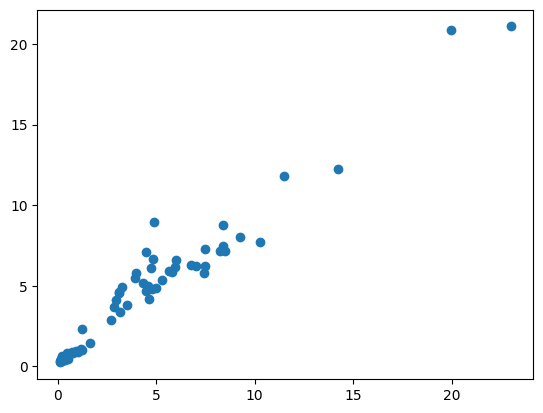

In [37]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)

# pickle file for deployment

In [41]:
import pickle
file_path = "rf_model.pkl"
with open(file_path, 'wb') as f:
    pickle.dump(model, f)

In [44]:
import pickle
file_path = "rf_model.pkl"
with open(file_path, 'rb') as f:
    model = pickle.load(f)
model

ExtraTreesRegressor()